# 다양한 단어 표현 방법

1. 국소 표현(Local Representation)≒이산 표현(Discrete Representation)
 - 해당 단어 자체만을 보고 특정값을 맵핑해 단어를 표현하는 방법
2. 분산 표현(Distributed Representation)≒연속 표현(Continuous Representation)
 - 그 단어를 표현하고자 주변을 참고해 단어를 표현하는 방법
 - 단어의 의미, 뉘앙스 표현 가능.
 


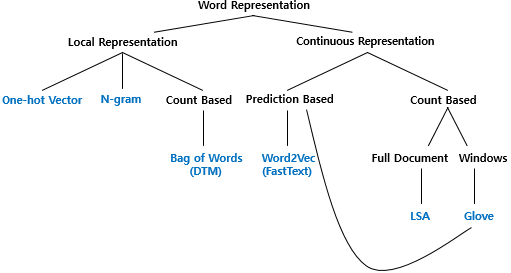

# Bag of Words

**단어들의 출현 빈도(frequency)에만 집중하는 텍스트 데이터 수치화 표현 방법.**

1. 각 단어에 고유한 정수 인덱스 부여
2. 각 인덱스 위치에 단어 토큰 등장 횟수를 기록한 벡터 생성

불용어에 해당하는 조사를 제거하면 더 정제된 BoW를 만들 수 있다.

In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 25.3 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
  # 온점 제거 및 형태소 분석
  document = document.replace('.', '')
  tokenized_document = okt.morphs(document)

  word_to_index = {}
  bow = []

  for word in tokenized_document:  
    if word not in word_to_index.keys():
      word_to_index[word] = len(word_to_index)  
      # BoW에 전부 기본값 1을 넣는다.
      bow.insert(len(word_to_index) - 1, 1)
    else:
      # 재등장하는 단어의 인덱스
      index = word_to_index.get(word)
      # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더한다.
      bow[index] = bow[index] + 1

  return word_to_index, bow

In [ ]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab) # 각 단어에 인덱스를 부여한 결과
print('bag of words vector :', bow) # BoW

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [ ]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [ ]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 문서인지 판단하는 작업 <BR>즉, **분류 문제**나 **문서 간 유사도**를 구하는 문제에 주로 쓰임.

## CountVectorizer를 이용한 BoW 생성

- 기본적으로 길이가 1 이상인 문자에 대해서만 토큰으로 인식.
- 띄어쓰기만을 기준으로 단어를 자름.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


### 불용어를 제거한 BoW

In [ ]:
from nltk.corpus import stopwords

# 사용자 정의
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [ ]:
# CountVectorizer 자체 제공 불용어
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# NLTK 지원 불용어
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# 문서 단어 행렬(Document-Term Matrix, DTM)

서로 다른 문서에서의 BoW를 결합한 표현 방법.
<br>행과 열을 반대로 선택하면 TDM이라 부르기도 함.

다음과 같은 4개의 문서가 있다 가정하자.

1. 먹고 싶은 사과
2. 먹고 싶은 바나나
3. 길고 노란 바나나 바나나
4. 저는 과일이 좋아요

띄어쓰기 단어 토큰화가 수행되었다 가정하고 문서 단어 행렬로 표현하면 다음과 같다.

## 한계

1. 희소 표현(Sparse representation)

- 원-핫 벡터가 공간적 낭비와 계산 리소스가 증가될 수 있다는 단점이 있는 것과 마찬가지로 DTM도 각 문서 벡터 차원은 전체 단어 집합 크기를 갖게 된다.
- 많은 문서 벡터가 대부분 값이 0일 수 있다.

이러한 대부분의 값이 0인 희소 벡터(sparse vector) 혹은 희소 행렬(sparse matrix)는 많은 양의 저장 공간과 높은 계산 복잡도를 요구한다.
<br>=> 구두점, 빈도수가 낮은 단어, 불용어 제거, 어간 및 표제어 추출 등을 통해 단어를 정규화하여 단어 집합 크기를 줄일 수 있다.


2. 단순 빈도 수 기반 접근

- `the`와 같은 단어 같은 경우는 어떤 문서든 자주 등장한다. 이렇게 되면 문서의 유사성을 판단할 때 모든 문서가 동일히 `the`의 빈도수가 높다 해서 문서들이 유사하다고 판단해선 안 된다.
- 이를 처리하기 위해 불용어와 중요한 단어에 대해 가중치를 줄 수 없을까? 이러한 아이디어에서 나온 TF-IDF에 대해서 바로 알아보자.

# TF-IDF(Term Frequency Inverse Document Frequency, 단어 빈도-역 문서 빈도)

**단어의 빈도와 역 문서 빈도를 사용하여  DTM 내 각 단어들마다 중요한 정도를 가중치로 주는 방법**

다음과 같은 작업에 사용된다.
- 문서 유사도 구하는 작업
- 검색 시스템에서 검색 결과 중요도 선정 작업
- 문서 내 특정 단어의 중요도 구하는 작업

TF-IDF는 TF와 IDF를 곱한 값을 의미한다.
<br>정의는 다음과 같다. *(d=문서, t=단어, n=문서 총 개수)*
1. **tf(d, t) : 특정 문서 d에서의 특정 단어 t 등장 횟수**
 - 각 단어의 등장 빈도 수. (DTM에서 구한 각 단어들 값과 동일.)

2. **df(t) : 특정 단어 t가 등장한 문서 수**
 - 앞의 예제에서 바나나는 총 3번 등장했지만 등장한 문서 수는 2개이기 때문에 df(t)= 2가 된다.

3. **idf(d, t) : df(t)에 반비례하는 수.**
 - $idf(d, t) = log(\frac{n}{1+df(t)})$
 - log를 취해주는 이유는 총 문서의 수 n이 커질수록 IDF의 값이 기하급수적으로 커지는 상황을 방지하기 위해서이다.
 - 분모에 1을 더해주는 이유는 특정 단어가 전체 문서에서 등장하지 않을 때 분모가 0이 되는 상황 방지하기 위해서이다.


In [37]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [38]:
# 총 문서의 수
N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [42]:
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [43]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [44]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_


,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


## 사이킷런 활용 DTM, TF-IDF 실습

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
